<a href="https://colab.research.google.com/github/JPapECE/ArtificialIntelligence2024_NTUA/blob/main/ML24_labproject2_03121205_PapaderakisDimitrios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Μηχανική Μάθηση
####2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

Ονοματεπώνυμο φοιτητή: Παπαδεράκης Δημήτριος

Α.Μ.: 03121205


### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

In [ ]:
#Question 1a
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/salinas_image.npy'
labels_path = '/content/drive/MyDrive/salinas_labels.npy'

image = np.load(image_path)
labels = np.load(labels_path)

Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

In [ ]:
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

In [ ]:
#Question 2a
print("Question 2a\n")
height, width, channels = image.shape

print("Height [pixels]:", height)
print("Width [pixels]:", width)
print("Number of Channels:", channels)


Question 2a

Height [pixels]: 512
Width [pixels]: 217
Number of Channels: 204


Question 2b



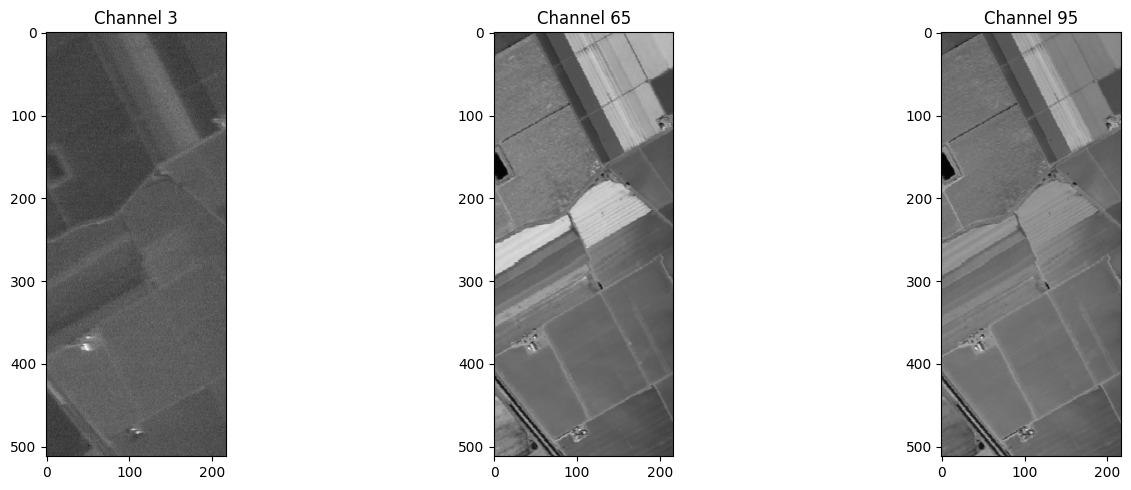

In [ ]:
#Question 2b
print("Question 2b\n")

import matplotlib.pyplot as plt

# image[height , width , channels]
# Extract the desired channels
channel_3 = image[:, :, 2]  # 3rd channel (index 2)
channel_65 = image[:, :, 64]  # 65th channel (index 64)
channel_95 = image[:, :, 94]  # 95th channel (index 94)

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each channel
axes[0].imshow(channel_3, cmap='gray')
axes[0].set_title('Channel 3')

axes[1].imshow(channel_65, cmap='gray')
axes[1].set_title('Channel 65')

axes[2].imshow(channel_95, cmap='gray')
axes[2].set_title('Channel 95')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Question 2c

print("Question 2c\n")
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Number of Unique Labels", len(unique_labels))

Question 2c

Number of Unique Labels 17


Έχουμε δηλαδή 17 καλλιέργιες όσες και οι δοσμένες κλάσεις μείον 1.

Question 2d



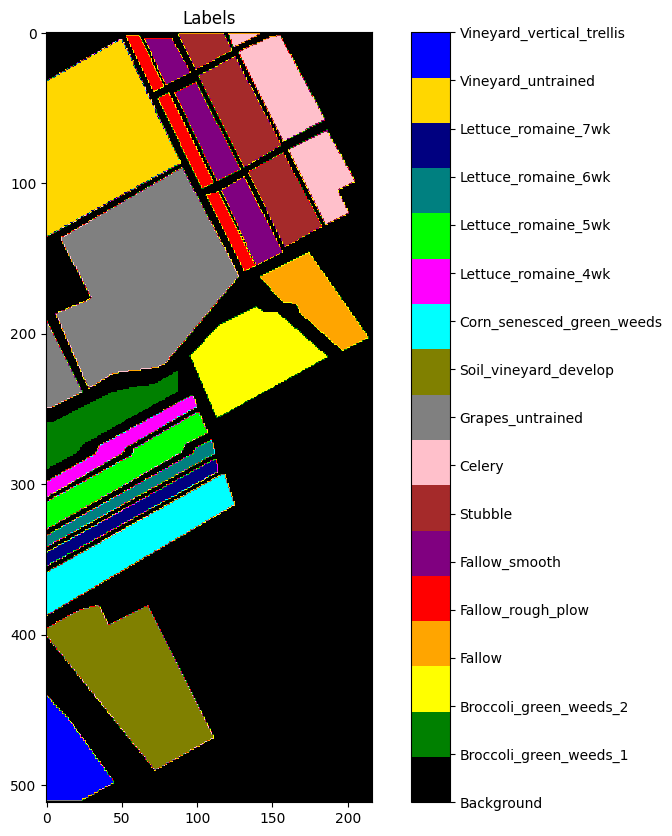

In [ ]:
#Question 2d

print("Question 2d\n")

from matplotlib.colors import ListedColormap

# Create a figure
plt.figure(figsize=(10, 10))
# Plot the labels
colors = [
    "black", "green", "yellow", "orange", "red", "purple", "brown", "pink",
    "gray", "olive", "cyan", "magenta", "lime", "teal", "navy", "gold", "blue"
]
cmap = ListedColormap(colors)
plt.imshow(labels, cmap=cmap)



# Create a colorbar with discrete ticks and labels
cbar = plt.colorbar(ticks=np.arange(len(classes)), orientation='vertical')
cbar.set_ticklabels(classes)

# Set title and display the plot
plt.title('Labels')
plt.show()

In [ ]:
#Question 2e
print("Question 2e\n")

import numpy as np

# Print the results
for label, count in zip(classes, label_counts):
    print(f"Label {label}: {count} pixels")

Question 2e

Label Background: 56975 pixels
Label Broccoli_green_weeds_1: 2009 pixels
Label Broccoli_green_weeds_2: 3726 pixels
Label Fallow: 1976 pixels
Label Fallow_rough_plow: 1394 pixels
Label Fallow_smooth: 2678 pixels
Label Stubble: 3959 pixels
Label Celery: 3579 pixels
Label Grapes_untrained: 11271 pixels
Label Soil_vineyard_develop: 6203 pixels
Label Corn_senesced_green_weeds: 3278 pixels
Label Lettuce_romaine_4wk: 1068 pixels
Label Lettuce_romaine_5wk: 1927 pixels
Label Lettuce_romaine_6wk: 916 pixels
Label Lettuce_romaine_7wk: 1070 pixels
Label Vineyard_untrained: 7268 pixels
Label Vineyard_vertical_trellis: 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
#Question 3a
print("Question 3a\n")
# Reshape the image to N x K (pixels x channels)
reshaped_image = image.reshape(height * width, channels)

# Reshape the labels to a 1D array of length N (pixels)
reshaped_labels = labels.reshape(height * width)

print("Reshaped Image Shape:", reshaped_image.shape)
print("Reshaped Labels Shape:", reshaped_labels.shape)

Question 3a

Reshaped Image Shape: (111104, 204)
Reshaped Labels Shape: (111104,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

 Η ακτινοβολία που αντανακλάται από μια επιφάνεια στα διάφορα μήκη κύματος, ονομάζεται φασματική υπογραφή της επιφάνειας.

Question 3b



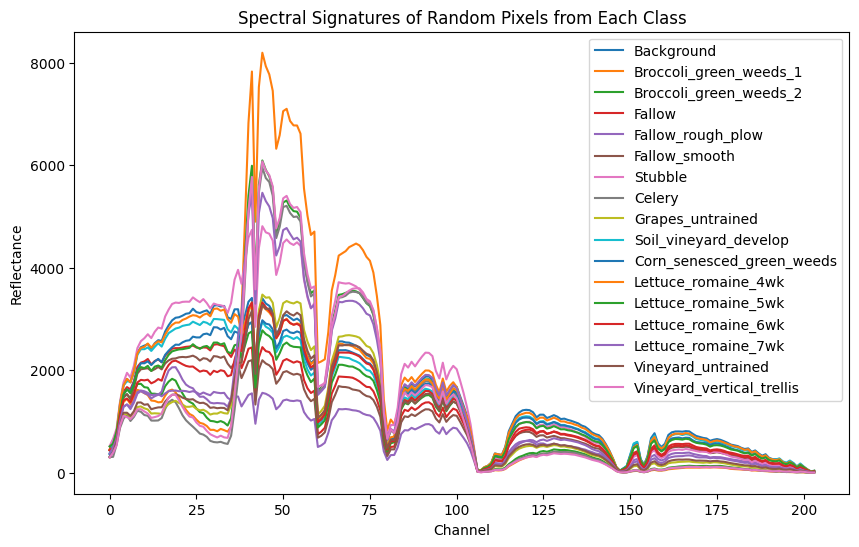

In [ ]:
#Question 3b
print("Question 3b\n")
import numpy as np
import matplotlib.pyplot as plt

unique_r_labels = np.unique(reshaped_labels)

random_pixels = []
for label in unique_r_labels:
  # Find indices of pixels belonging to the current label
  indices = np.where(reshaped_labels == label)[0]
  # Select a random index from these indices
  random_index = np.random.choice(indices)
  # Append the selected pixel's spectral signature to the list
  random_pixels.append(reshaped_image[random_index])

# Create a figure and axes
plt.figure(figsize=(10, 6))
# Plot each spectral signature
for i, pixel in enumerate(random_pixels):
  plt.plot(pixel, label=classes[unique_labels[i]])
# Set plot labels and title
plt.xlabel("Channel")
plt.ylabel("Reflectance")
plt.title("Spectral Signatures of Random Pixels from Each Class")
# Add a legend
plt.legend()
# Display the plot
plt.show()

3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

 * Κάποιες καλλιέργιες διαχωρίζονται πιο εύκολα

 * Φαίνεται πως δεν συμβάλλουν όλα τα κανάλια το ίδιο , πχ μετά το 100 δεν υπάρχει μεγάλη διαχωρησιμότητα ενώ από 30 εώς 60 συμβάλει πολύ.

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

Το πρόσημο της συσχέτισης δύο μεταβλητών μας πληροφορεί  για
το αν αύξηση της μιας μεταβλητής αντιστοιχεί σε αύξηση ή σε μείωση της άλλης. Η απόλυτη τιμή της είναι αυτή που μας δίνει το μέτρο της συσχέτισης και κυμαίνεται μεταξύ -1 και 1. Ο πίνακας προφανώς θα είναι συμμετρικός.

Question 3d



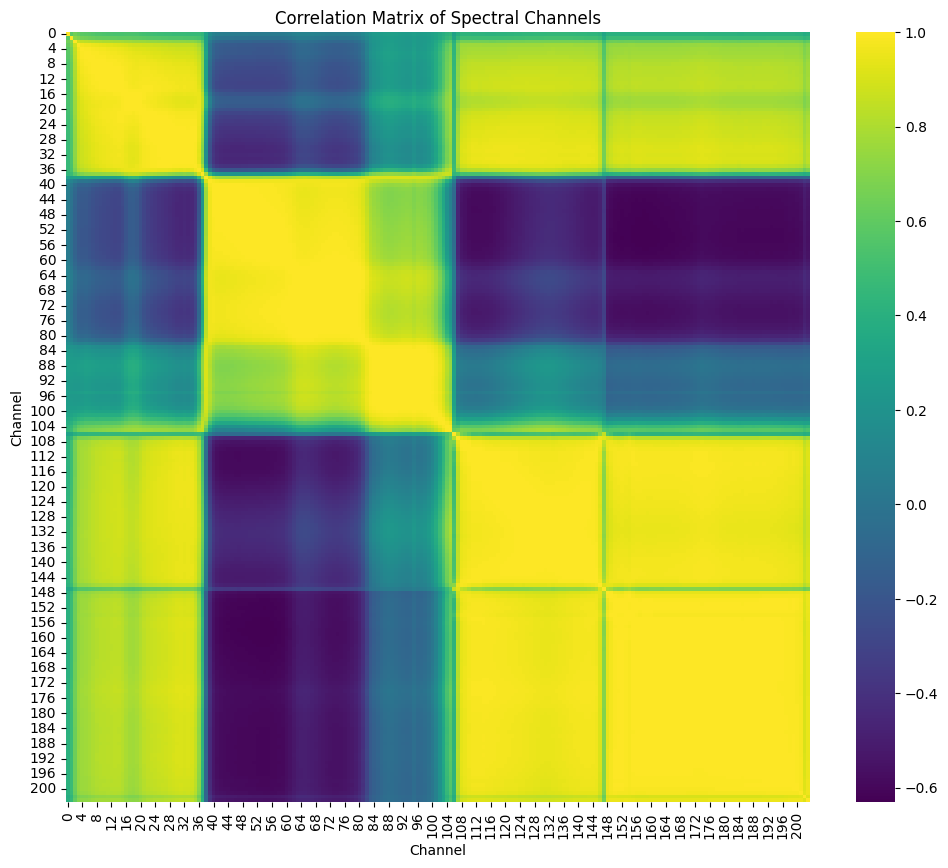

In [ ]:
#Question 3d
print("Question 3d\n")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix of the reshaped image
correlation_matrix = np.corrcoef(reshaped_image.T)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False)
plt.title("Correlation Matrix of Spectral Channels")
plt.xlabel("Channel")
plt.ylabel("Channel")
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

**Συσταδοποίηση:** Συσταδοποίηση είναι η διαδικασία εκείνη κατά την οποία ένα σύνολο από «αντικείμενα», διαχωρίζονται σε ένα σύνολο από λογικές ομάδες. Η καταχώρηση αντικειμένων σε ίδια ομάδα μεταφράζεται ως ομοιότητα των αντικειμένων αυτών και αντίστροφα (αντικείμενα που ανήκουν σε διαφορετικές ομάδες είναι ανόμοια).
[Από Wiki](https://el.wikipedia.org/wiki/%CE%A3%CF%85%CF%83%CF%84%CE%B1%CE%B4%CE%BF%CF%80%CE%BF%CE%AF%CE%B7%CF%83%CE%B7)

Ο αλγόριθμος **KMeans** είναι ένας αλγόριθμος μηχανικής μάθησης που χρησιμοποιείται για συσταδοποίηση, δηλαδή για την ομαδοποίηση δεδομένων σε συστάδες (clusters) με βάση την ομοιότητά τους.

Βασική ιδέα:

Ο KMeans προσπαθεί να βρει τα κέντρα (centroids) των συστάδων, έτσι ώστε κάθε σημείο δεδομένων να ανήκει στη συστάδα με το κέντρο που βρίσκεται πιο κοντά σε αυτό.

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.

In [ ]:
#Questio 4a
print("Question 4a\n")
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# 1. Apply KMeans
kmeans = KMeans(n_clusters=17, random_state=0)  # Initialize KMeans with 17 clusters
cluster_labels = kmeans.fit_predict(reshaped_image)  # Fit and predict cluster labels

# 2. Evaluate using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(reshaped_labels, cluster_labels)  # Calculate ARI
print(f"Adjusted Rand Index (ARI): {ari}")

# 3. Evaluate using Silhouette Score
silhouette = silhouette_score(reshaped_image, cluster_labels)  # Calculate Silhouette Score
print(f"Silhouette Score: {silhouette}")

Adjusted Rand Index (ARI): 0.14285393517763426
Silhouette Score: 0.40339775554605456


**ARI** : Θετικό αλλά μακριά από την μονάδα, άρα δεν υπάρχει μεγάλη συμφωνία με την πραγματική κατανομή , και έχουμε και κάποιες επικαλύψεις στις συστάδες.

**Silhouette** : Εδώ καταλαβαίνουμε πως υπάρχει συνοχή στα δεδομένα μας

4.β. Χρησιμοποιώντας τα αποτελέσματα τις συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

Question 4b



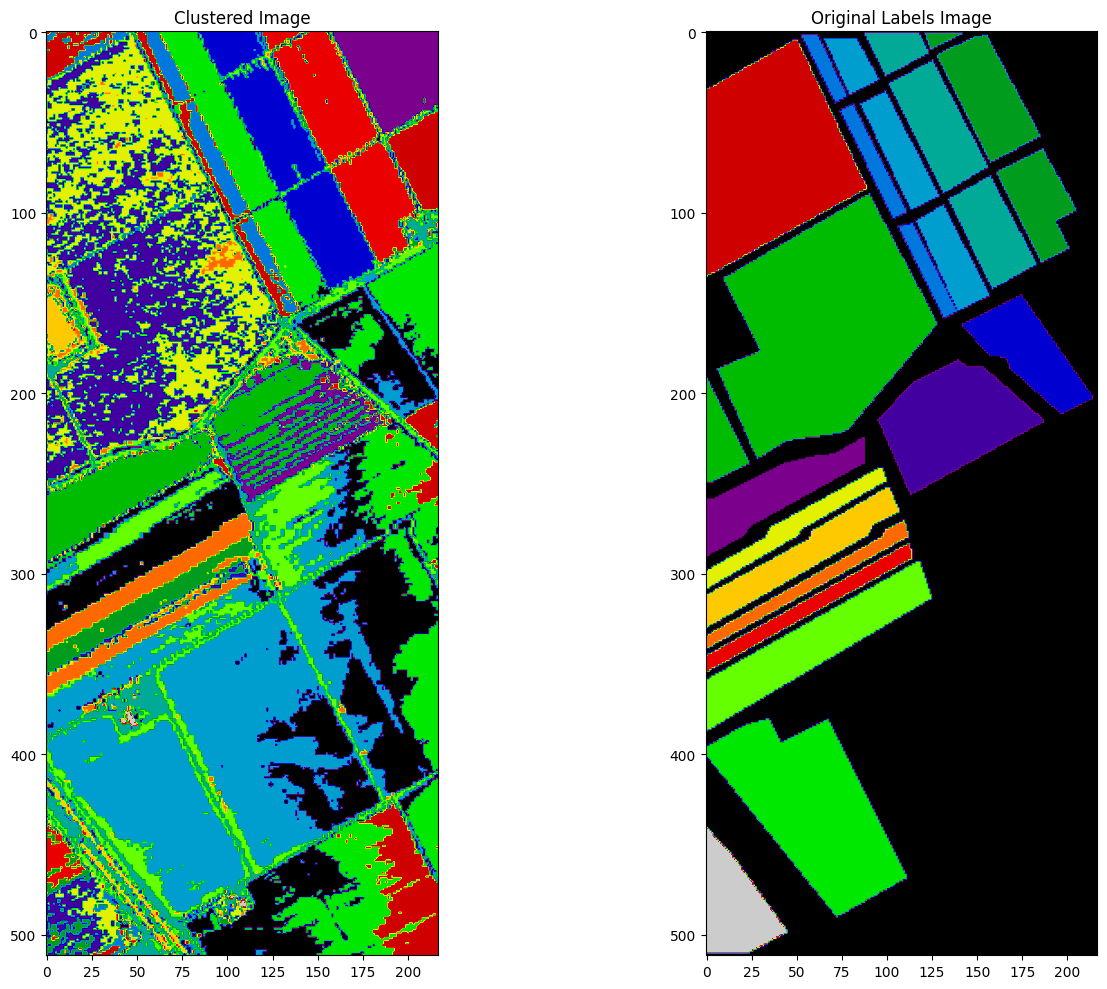

In [ ]:
#Question 4b
print("Question 4b\n")
import numpy as np
import matplotlib.pyplot as plt

# Reshape the cluster labels to the original image shape
clustered_image = cluster_labels.reshape(height, width)

# Create a figure and axes for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # 1 row, 2 columns

# Plot the clustered image on the left subplot
axes[0].imshow(clustered_image, cmap='nipy_spectral')
axes[0].set_title("Clustered Image")

# Plot the original labels image on the right subplot
axes[1].imshow(labels, cmap='nipy_spectral')
axes[1].set_title("Original Labels Image")

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

Τα όρια είναι κάπως ευδιάκριτα αλλά όχι τελείως καθαρά.  Σε πολλά σημεία έχουν δημιουργηθεί παραπάνω συστάδες από όσες θα έπρεπε και σε πολλά σημεία έχει γίνε λάθος αντιστοίχηση

4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

Η κύρια διαφορά του **Fuzzy C-means** με κάποιον άλλον αλγόριθμο hard clustering είναι πως στο hard clustering , κάθε pixel αντιστοιχεί  σε ένα pixel , ενώ στο soft clustering (πχ τύπου Fuzzy) μπορεί να έχουμε αντιστοίχιση και σε παραπάνω από ένα.

In [ ]:
# Step 1: Install the library
!pip install fuzzy-c-means

# Step 2: Execute the algorithm
from fcmeans import FCM  # Import FCM class

# Initialize FCM with 17 clusters
fcm = FCM(n_clusters=17)

# Fit the model to the reshaped image data
fcm.fit(reshaped_image)

# Get cluster labels
fcm_labels = fcm.predict(reshaped_image)

# Evaluate using Adjusted Rand Index (ARI)
ari_fcm = adjusted_rand_score(reshaped_labels, fcm_labels)
print(f"Adjusted Rand Index (ARI) with Fuzzy C-Means: {ari_fcm}")

# Evaluate using Silhouette Score
silhouette_fcm = silhouette_score(reshaped_image, fcm_labels)
print(f"Silhouette Score with Fuzzy C-Means: {silhouette_fcm}")

Adjusted Rand Index (ARI) with Fuzzy C-Means: 0.12731583574795918
Silhouette Score with Fuzzy C-Means: 0.34909375783817004


Οι μετρικές εδώ είναι αντοίστιχες αλλά μικρότερες.

### 5. Μείωση διαστατικότητας δεδομένων

**Μείωση διαστατικότητας δεδομένων**: Η μείωση της διαστατικότητας είναι μια τεχνική που χρησιμοποιείται για τη
μείωση του αριθμού των χαρακτηριστικών σε ένα σύνολο δεδομένων,
διατηρώντας ταυτόχρονα όσο το δυνατόν περισσότερες σημαντικές
πληροφορίες.
[link](https://eclass.hmu.gr/modules/document/file.php/ECE138/%CE%98%CE%B5%CF%89%CF%81%CE%AF%CE%B1/Lecture%202.pdf)

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

**PCA**
* Υπολογισμός πίνακα συμμεταβλητότητας
* Ευρεση ιδιοτιμών και ιδιοδιανυσμάτων
* **Επιλογή Κύριων Συνιστωσών (Principal Components)**:
Επιλέγουμε τις συνιστώσες με τις μεγαλύτερες ιδιοτιμές, καθώς αυτές εξηγούν το μεγαλύτερο μέρος της διακύμανσης στα δεδομένα.
* Προβολή των δεδομένων στα νέα διανύσματα


In [ ]:
#Question 5a
print("Question 5a\n")
from sklearn.decomposition import PCA

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the reshaped image data
pca.fit(reshaped_image)

# Transform the data to the reduced dimensionality
reduced_data = pca.transform(reshaped_image)

# Print the shape of the reduced data
print("Shape of reduced data:", reduced_data.shape)

Question 5a

Shape of reduced data: (111104, 3)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [ ]:
#Question 5b
print("Question 5b\n")

# Access the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total variance explained by the first 3 components
total_variance = sum(explained_variance)

# Print the total variance explained
print(f"Total variance explained by the first 3 components: {total_variance:.4f}")  # Format to 4 decimal places


Question 5b

Total variance explained by the first 3 components: 0.9914


Άρα ενώ διατηρούμε  μόνο τις 3 κύριες συνιστώσες των δεδομένων μας, έχουμε καλύψει το 99% της διακύμανσης τους, ενώ έχουμε μειώσει πολύ τον αριθμό των διαστάσεων.

### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;

6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

Question 6a

Adjusted Rand Index (ARI) with reduced data: 0.1664
Silhouette Score with reduced data: 0.4364
Question 6b



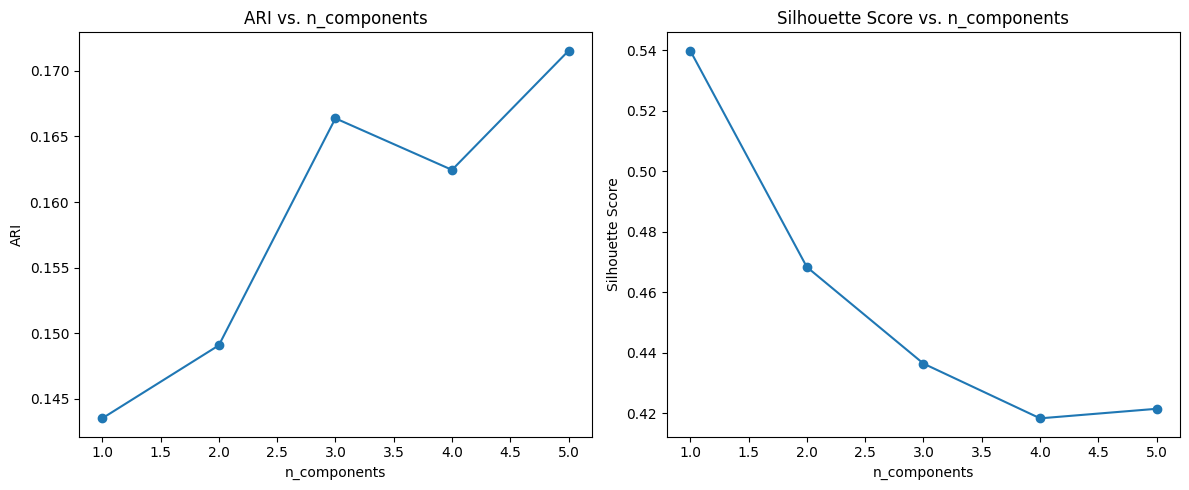

In [ ]:
#Question 6a
print("Question 6a\n")

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Initialize KMeans with 17 clusters
kmeans_reduced = KMeans(n_clusters=17, random_state=0)

# Fit KMeans to the reduced data
kmeans_reduced.fit(reduced_data)

# Predict cluster labels for the reduced data
cluster_labels_reduced = kmeans_reduced.predict(reduced_data)

# Evaluate using Adjusted Rand Index (ARI)
ari_reduced = adjusted_rand_score(reshaped_labels, cluster_labels_reduced)
print(f"Adjusted Rand Index (ARI) with reduced data: {ari_reduced:.4f}")

# Evaluate using Silhouette Score
silhouette_reduced = silhouette_score(reduced_data, cluster_labels_reduced)
print(f"Silhouette Score with reduced data: {silhouette_reduced:.4f}")

#Question 6b
print("Question 6b\n")



# Range of n_components to test
n_components_range = range(1, 6)

# Lists to store the scores
ari_scores = []
silhouette_scores = []

# Loop through different n_components values
for n_components in n_components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(reshaped_image)

    # Apply KMeans
    kmeans = KMeans(n_clusters=17, random_state=0)
    cluster_labels = kmeans.fit_predict(reduced_data)

    # Calculate and store scores
    ari_scores.append(adjusted_rand_score(reshaped_labels, cluster_labels))
    silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, ari_scores, marker='o')
plt.title("ARI vs. n_components")
plt.xlabel("n_components")
plt.ylabel("ARI")

plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. n_components")
plt.xlabel("n_components")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


Παίρνουμε βελτιωμένα αποτελέσματα με αυτόν τον συνδυασμό , ωστόσο παραμένουν στην ίδια τάξη μεγέθους.

# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές). Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.

---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [ ]:
 !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
 ! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating: 2750/SeaLake/SeaLake_1314.jpg  
  infl

---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras. Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.

---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


In [ ]:
import tensorflow as tf

# 1. Load MobileNetV3Small
base_model = tf.keras.applications.MobileNetV3Small(
    include_top=False,  # Remove the classification layer
    pooling='avg',      # Add average pooling layer
    weights='imagenet'  # Load weights pre-trained on ImageNet
)

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Create the feature extractor model
feature_extractor = tf.keras.Model(
    inputs=base_model.input,
    outputs=base_model.output
)

/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


In [ ]:
import numpy as np

# Reset the dataset iterator to the beginning
dataset.reset()

# Extract features from all images in the dataset
features = feature_extractor.predict(dataset)

# Print the shape of the extracted features
print("Shape of extracted features:", features.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 63s 23ms/step
Shape of extracted features: (2700, 576)


### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Initialize KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)

# Fit KMeans to the extracted features
kmeans.fit(features)

# Predict cluster labels for the features
cluster_labels = kmeans.predict(features)

# Get the true labels from the dataset
true_labels = dataset.classes

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, cluster_labels)

# Print the ARI score
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.4788


Παίρνουμε πολύ καλύτερο αποτέλεσμα

### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 1. Normalization and Data Integration
dataset.reset()  # Reset the dataset iterator
pixel_features = []
for i in range(len(dataset)):
    image, _ = dataset[i]  # Get image and label
    image = image.reshape(-1)  # Reshape to 1D
    image = image / 255.0  # Normalize to [0, 1]
    pixel_features.append(image)
pixel_features = np.array(pixel_features)  # Convert to NumPy array

# 2. Apply KMeans
kmeans_pixels = KMeans(n_clusters=10, random_state=0)
cluster_labels_pixels = kmeans_pixels.fit_predict(pixel_features)

# 3. Calculate ARI
true_labels = dataset.classes  # Get true labels
ari_pixels = adjusted_rand_score(true_labels, cluster_labels_pixels)

# 4. Comparison
print(f"Adjusted Rand Index (ARI) using pixel features: {ari_pixels:.4f}")
print(f"Adjusted Rand Index (ARI) using CNN features: {ari:.4f}")  # Assuming 'ari' from previous step

Adjusted Rand Index (ARI) using pixel features: 0.1408
Adjusted Rand Index (ARI) using CNN features: 0.4788


Το ARI στην περίπτωση του CNN είναι 0.48, πολύ μεγαλύτερο από το 0.1408 στην περίπτωση των σκέτων pixel values. Αυτό είναι λογικό, αφού το CNN πραγματοποιεί κατάλληλη προεπεξεργασία των εικόνων και ενισχύει τα χαρακτηριστικά που ευνοούν την ορθή συσταδοποίηση, σε αντίθεση με τις απλές τιμές των pixel όπου τα αποτελέσματα ουσιαστικά είναι παρόμοια με εκείνα του πρώτου μέρους της άσκησης.

### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

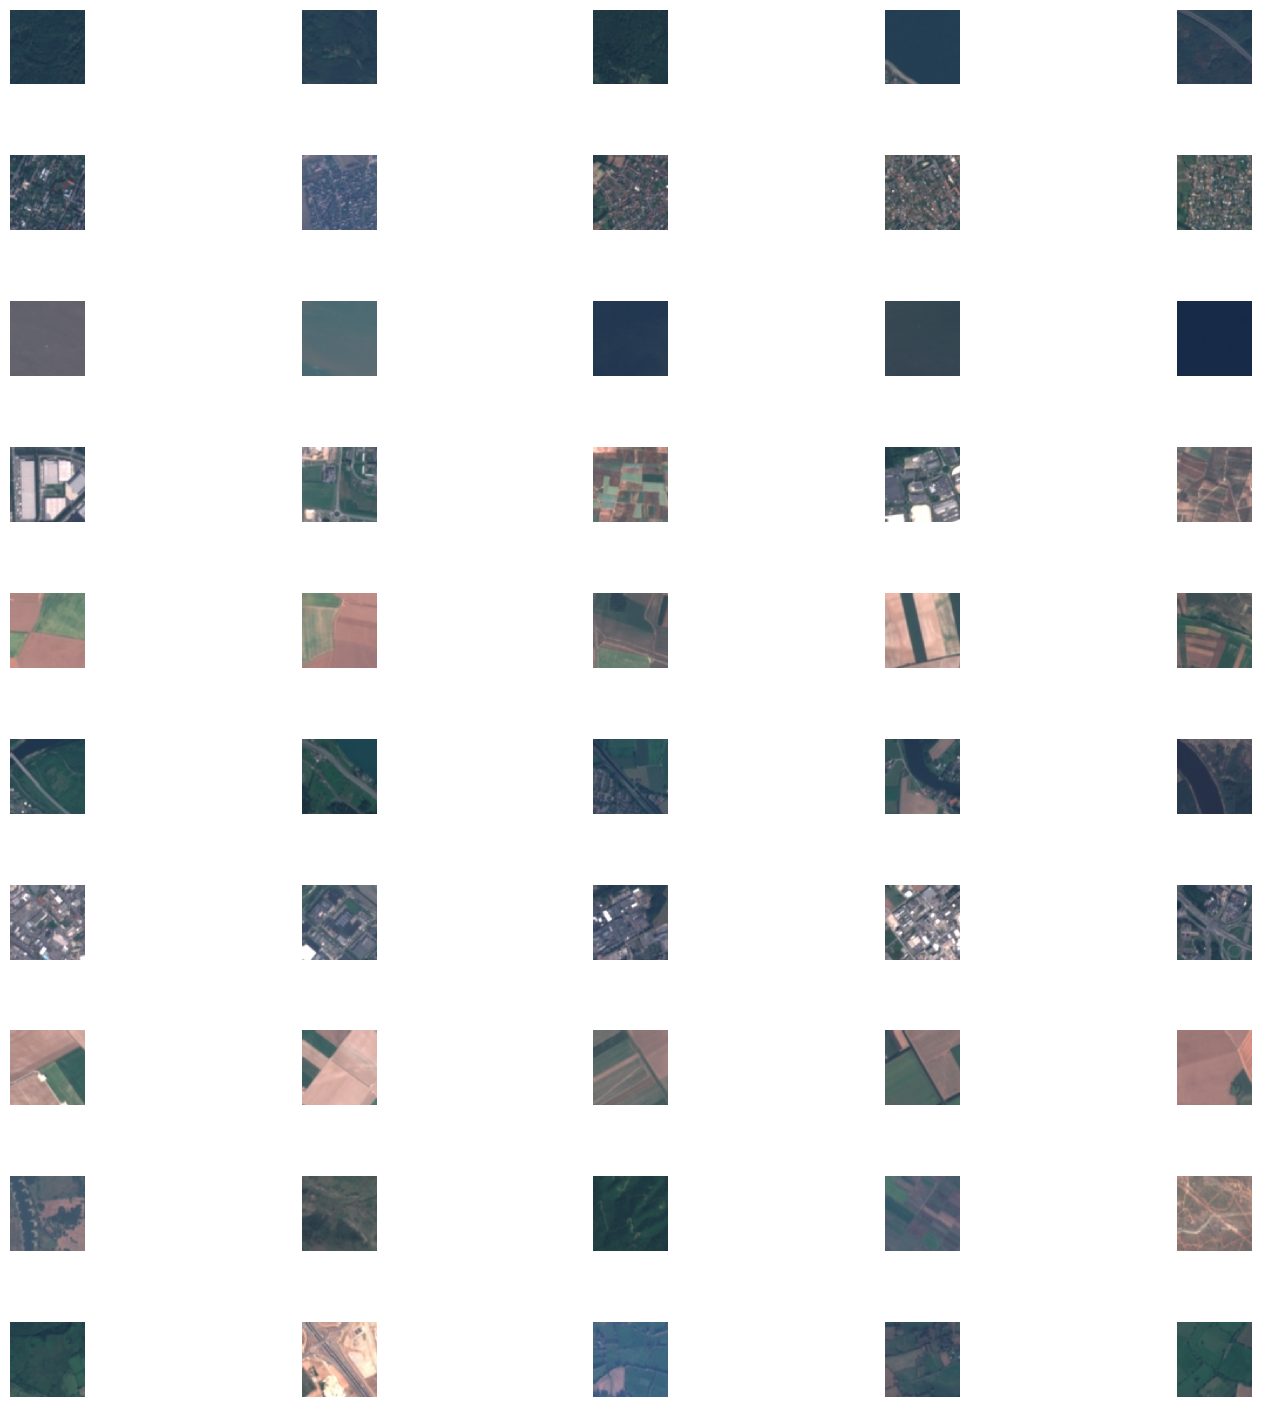

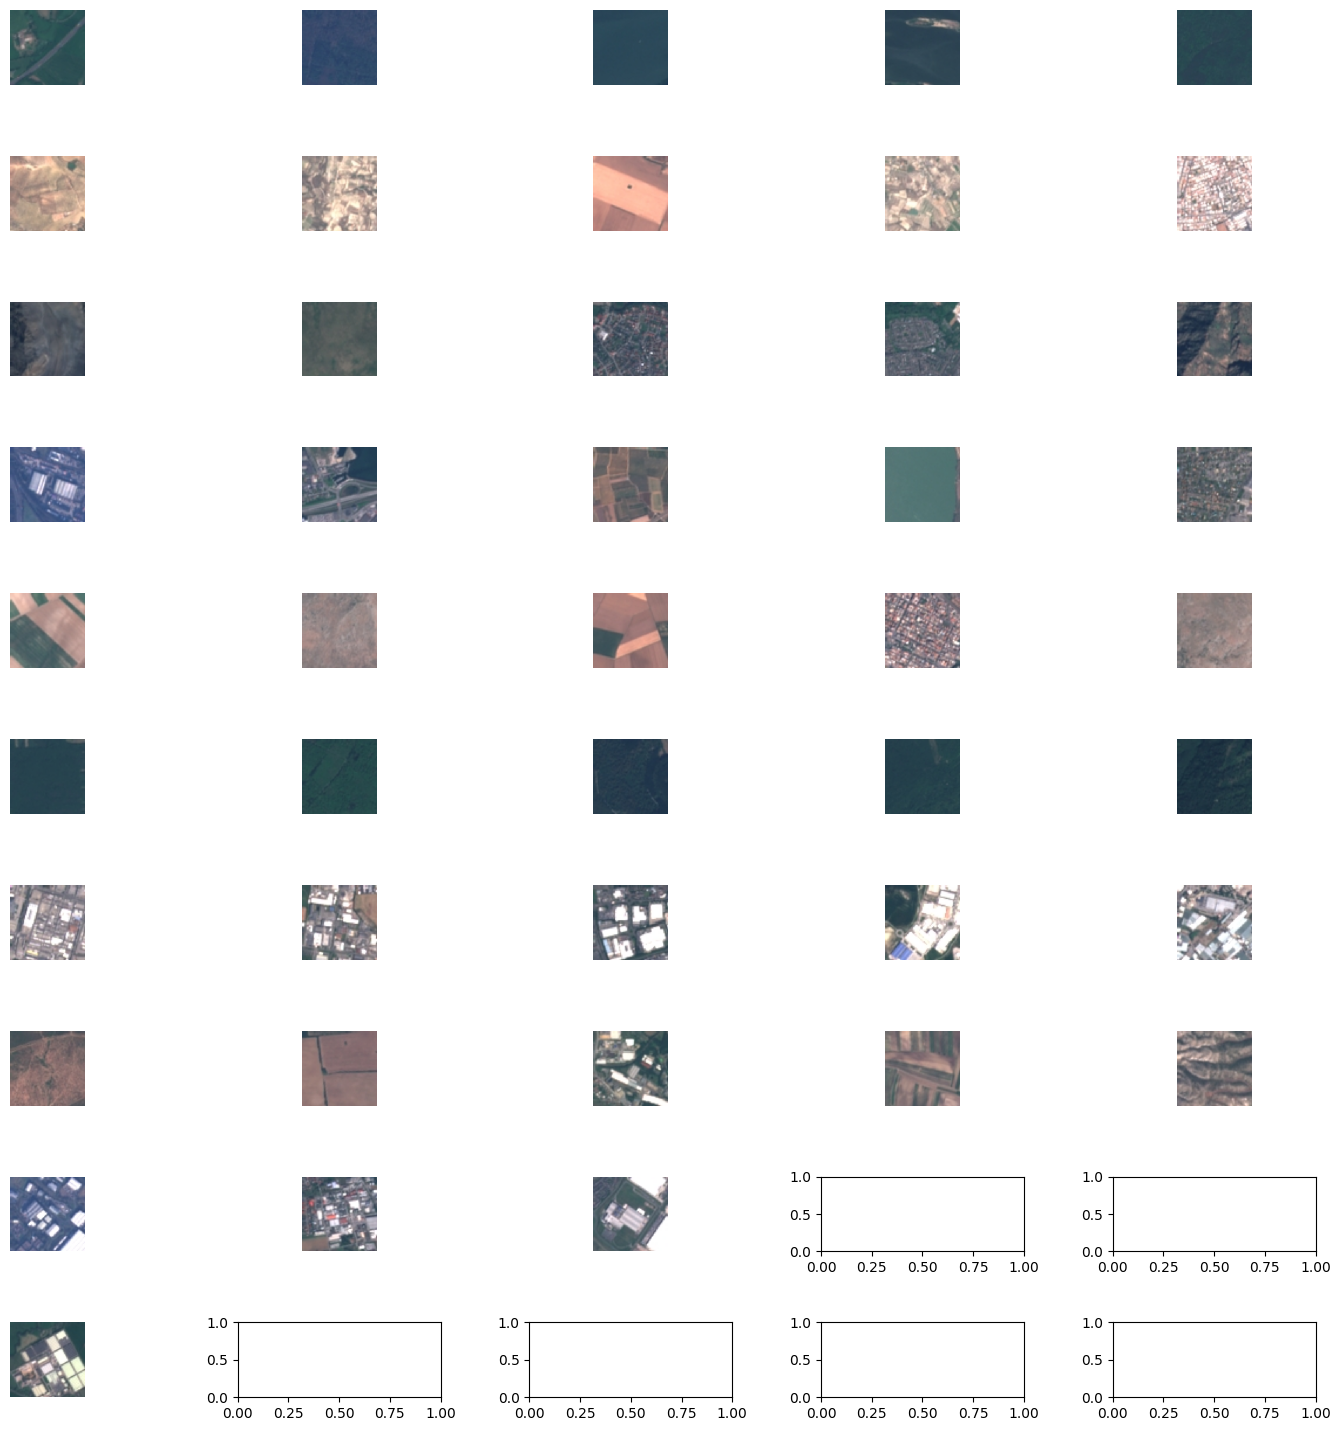

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_clusters(cluster_labels, dataset, num_images_per_cluster=5):
    num_clusters = len(np.unique(cluster_labels))
    fig, axes = plt.subplots(num_clusters, num_images_per_cluster, figsize=(15, 15))
    fig.tight_layout(pad=3.0)  # Add padding between subplots

    for cluster_id in range(num_clusters):
        # Get indices of images belonging to this cluster
        image_indices = np.where(cluster_labels == cluster_id)[0]

        # Select random images from this cluster, handling cases where the cluster has fewer images
        # than num_images_per_cluster
        num_images_to_select = min(len(image_indices), num_images_per_cluster)  # Select all images if the cluster has fewer than num_images_per_cluster
        selected_indices = np.random.choice(image_indices, size=num_images_to_select, replace=False)

        # Display the selected images in the grid
        for i, image_index in enumerate(selected_indices):
            image, _ = dataset[image_index]  # Get image and label
            # Squeeze the image array to remove the extra dimension
            image = np.squeeze(image)  # This line is added to remove the extra dimension
            axes[cluster_id, i].imshow(image.astype(np.uint8))  # Convert to uint8 for display
            axes[cluster_id, i].axis('off')  # Turn off axis labels

    plt.show()

# Visualize clusters for CNN features
visualize_clusters(cluster_labels, dataset)

# Visualize clusters for pixel features
visualize_clusters(cluster_labels_pixels, dataset)